<a href="https://colab.research.google.com/github/Lou1108/DeepLearning/blob/main/try_1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, GRU, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras.callbacks import EarlyStopping

2025-05-09 00:06:06.913836: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Loading

In [2]:
#data = loadmat('/content/drive/MyDrive/Deep Learning/Xtrain.mat')['Xtrain']
data = loadmat('Xtrain.mat')['Xtrain']
#As requested in point a) we scale the data, preparing it for the neural network.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

Converting time series into supervised learning format. It uses a sliding window (time_step) for one-step-ahead prediction

In [3]:
def create_dataset(data, time_step): #supervised format
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [4]:
X, y = create_dataset(scaled_data, 100)
X = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# Model Training
Training 3 different models (RNN, LSTM, and GRU) on the given test data to compare the errors.

Trying different time steps, as requested in point b) to tune for each of the different models the best performance and of all models the best one.

In [5]:
time_steps=list(range(25, 151, 25))
results_RNN = []
print("Training the RNN")
for ts in time_steps:
    X, y = create_dataset(scaled_data, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model_rnn.add(SimpleRNN(units=100))
    model_rnn.add(Dense(units=1))
    early_stop = EarlyStopping(monitor='loss', patience=5)
    model_rnn.compile(optimizer='adam', loss='mean_squared_error')

    model_rnn.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

    predictions = model_rnn.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_RNN.append([ts, mse, rmse, mae])

results_LSTM=[]
print("Training the LSTM")
for ts in time_steps:
    X, y = create_dataset(scaled_data, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model_lstm.add(LSTM(units=50))
    model_lstm.add(Dense(units=1))

    early_stop = EarlyStopping(monitor='loss', patience=5)
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')
    model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

    predictions = model_lstm.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_LSTM.append([ts, mse, rmse, mae])

results_GRU = []
print("Training the GRU")
for ts in time_steps:
  X, y = create_dataset(scaled_data, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])


Training the RNN


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1845
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0162
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0088
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0093
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0068
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0053
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0069
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
Epoch 1/100


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.2753
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0183
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0091
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0095
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0077
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0058
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0059
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0076
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0060
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0057
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0055
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0051
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0066
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0044
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1559
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0193
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0163
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0141
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0102
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0094
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0072
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0066
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0111
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0094
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0082
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0157
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - lo

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.1597
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0172
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0117
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0081
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0080
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0120
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0081
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0086
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0067
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0058
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0059
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0066
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0077
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0054
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0070
6

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.1319
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0160
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0084
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0080
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0073
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0083
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0074
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0075
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0081
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0088
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0078
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0097
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0070
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0097
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0068
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.1712
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0207
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0143
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0095
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0091
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0074
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0094
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0087
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0066
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0094
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0073
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0095
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0080
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0071
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0081
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0604
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0345
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0331
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0301
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0285
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0251
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0164
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0154
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0118
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0533
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0345
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0370
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0317
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0341
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0262
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0174
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0139
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0143
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0144
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0155
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0116
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0121
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0102
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0115
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0578
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0335
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0355
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0363
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0281
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0253
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0211
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0172
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0133
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0161
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0139
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0122
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0108
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0142
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0122
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0516
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0336
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0366
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0306
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0332
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0227
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0183
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0149
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0136
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0135
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0148
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0127
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0146
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0105
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0123
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0410
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0369
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0369
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0313
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0342
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0266
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0241
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0167
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0132
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0138
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0133
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0112
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0109
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0120
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0104


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0441
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0379
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0295
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0326
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0310
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0337
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0277
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0190
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0140
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0145
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0135
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0129
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0127
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0127
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.014

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0540
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0349
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0291
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0170
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0117
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0132
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0114
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0122
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0109
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0086
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0072
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0063
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0050
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0043
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0031
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0534
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0404
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0288
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0176
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0129
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0106
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0122
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0109
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0090
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0066
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0062
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0054
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0033
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - l

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0583
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0370
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0258
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0131
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0126
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0122
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0128
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0128
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0098
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0106
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0082
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0062
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0069
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0058
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - l

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0506
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0328
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0218
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0135
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0114
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0124
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0106
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0105
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0096
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0100
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0100
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0093
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0064
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0049
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0042
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0613
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0367
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0331
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0224
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0176
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0130
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0115
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0109
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0121
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0100
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0087
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0112
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0065
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0055
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0063
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0575
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0356
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0280
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0231
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0148
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0116
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0120
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0109
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0100
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0101
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0078
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0070
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0055
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0033
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0

### Results of the model training

In [6]:
# display the results of all three models
df_rnn = pd.DataFrame(results_RNN, columns=["time_step", "MSE", "RMSE", "MAE"])
df_lstm = pd.DataFrame(results_LSTM, columns=["time_step", "MSE", "RMSE", "MAE"])
df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("RNN results:\n", df_rnn)
print("\nLSTM results:\n", df_lstm)
print("\nGRU results:\n", df_gru)

RNN results:
    time_step         MSE       RMSE        MAE
0         25   60.962258   7.807833   6.012167
1         50  131.415091  11.463642   9.434460
2         75   81.011661   9.000648   6.791717
3        100  179.301406  13.390347  10.163931
4        125  168.425448  12.977883  11.367276
5        150   89.539785   9.462546   8.233931

LSTM results:
    time_step         MSE       RMSE       MAE
0         25    3.537328   1.880779  1.513256
1         50   34.569554   5.879588  4.828277
2         75   41.553621   6.446210  4.974873
3        100   14.243050   3.773997  2.836694
4        125   53.159347   7.291046  6.578419
5        150  104.783364  10.236375  7.201090

GRU results:
    time_step        MSE      RMSE       MAE
0         25  20.794702  4.560121  3.774810
1         50  10.862331  3.295805  2.722867
2         75  30.036741  5.480579  4.669799
3        100  14.921871  3.862884  3.162931
4        125  13.852926  3.721952  2.428236
5        150  24.284874  4.927969  3.795

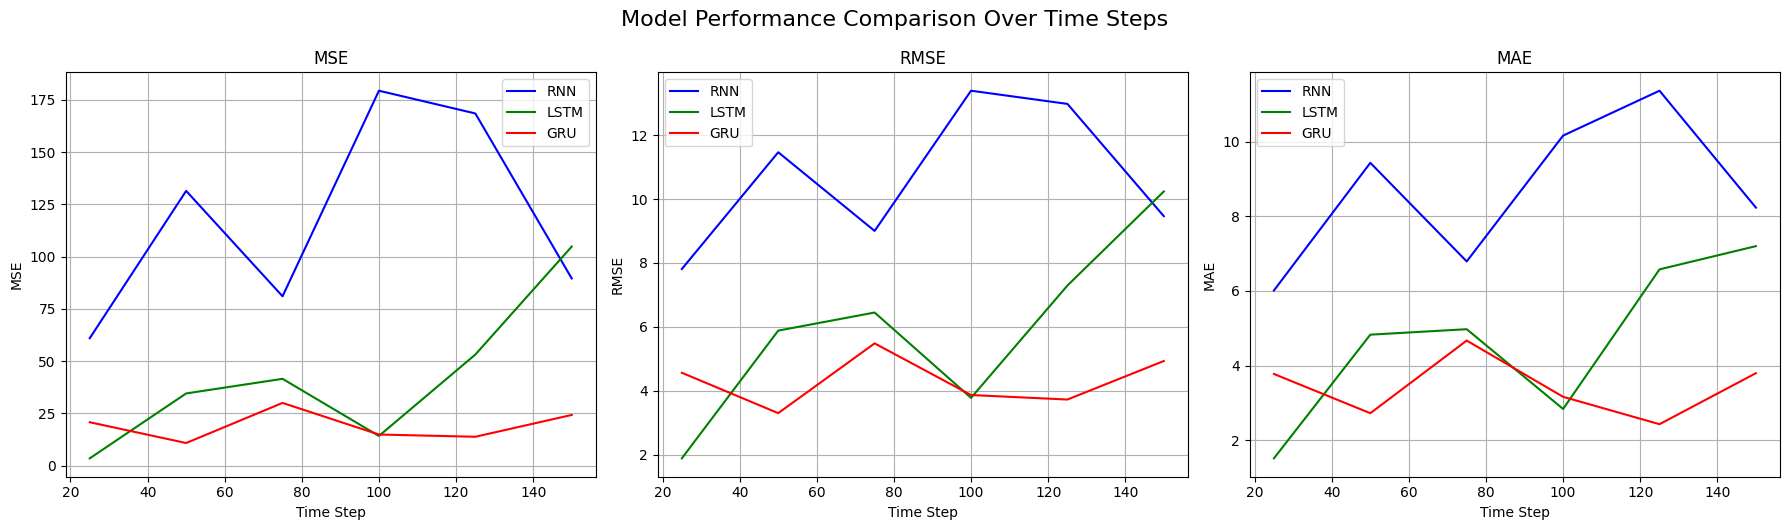

In [7]:
# create mappings for models
models = {"RNN": df_rnn, "LSTM": df_lstm, "GRU": df_gru}
colors = {"RNN": "blue", "LSTM": "green", "GRU": "red"}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
for idx, metric in enumerate(["MSE", "RMSE", "MAE"]):
    ax = axes[idx]
    for model_name, df in models.items():
        ax.plot(df["time_step"], df[metric], label=model_name, color=colors[model_name])
    ax.set_title(metric)
    ax.set_xlabel("Time Step")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Model Performance Comparison Over Time Steps", fontsize=16, y=1.05)
plt.savefig("ModelPerformanceComparison.jpg")
plt.show()

### Fine-tuning the window size for GRU

In [13]:
time_steps=list(range(100, 201, 25))
results_GRU = []
print("GRU")
for ts in time_steps:
  X, y = create_dataset(scaled_data, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])

df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("\nGRU results:\n", df_gru)

GRU
Epoch 1/100


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0501
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0306
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0272
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0132
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0116
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0115
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0113
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0104
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0112
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0100
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0080
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0071
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0045
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0042
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0042
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0545
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0357
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0296
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0202
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0125
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0146
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0124
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0129
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0115
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0098
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0095
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0079
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0048
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0051
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0034


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0690
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0336
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0317
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0239
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0185
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0134
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0119
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0108
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0106
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0100
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0095
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0072
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0061
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0056
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0051


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0522
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0297
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0284
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0199
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0116
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0111
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0125
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0108
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0109
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0090
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0095
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 0.0112
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0095
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0071
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - los

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0472
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0311
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0288
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0215
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0124
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0113
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0111
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0095
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0102
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0080
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0084
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0077
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0050
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0062
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step 

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0480
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0352
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0232
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0136
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0127
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0133
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0123
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0118
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0107
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0106
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0095
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0077
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0041
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0054
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0047
E

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0521
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0375
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0272
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0195
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0150
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0120
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0106
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0113
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0116
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0106
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0085
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - loss: 0.0085
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0066
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0047
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0037

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 0.0488
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0321
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.0256
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0155
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0151
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0125
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0108
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0120
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0101
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0110
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0113
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0083
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0075
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0051
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step -

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0504
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0323
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0239
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0139
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0118
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0118
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0100
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0100
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0099
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0091
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0106
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0097
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0068
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0053
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step -

/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - loss: 0.0589
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0290
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0280
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0244
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 0.0212
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 0.0098
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0108
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0089
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0099
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0096
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0085
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0071
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 0.0069
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0048
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step 

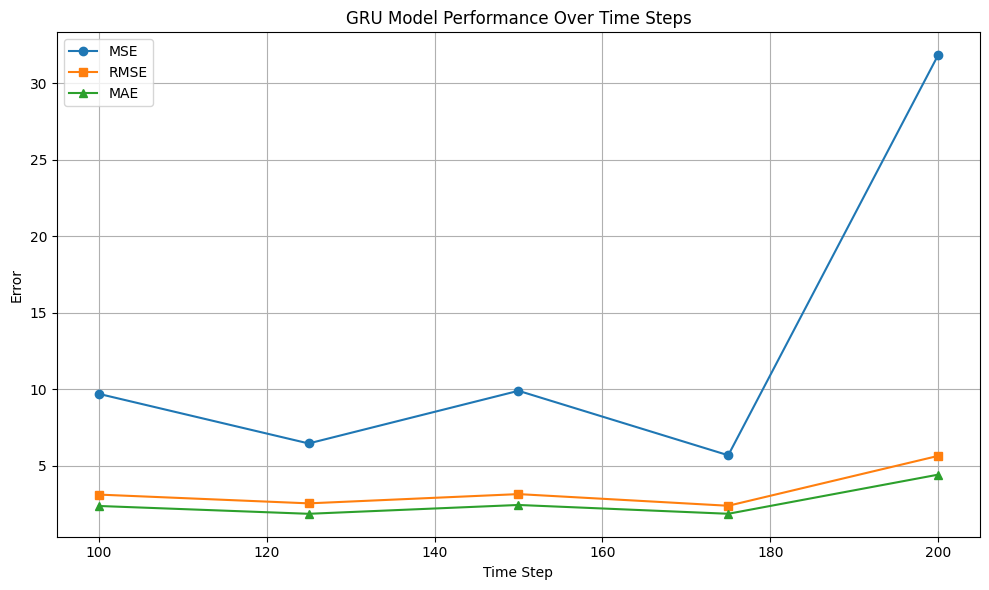

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df_gru["time_step"], df_gru["MSE"], marker='o', label='MSE')
plt.plot(df_gru["time_step"], df_gru["RMSE"], marker='s', label='RMSE')
plt.plot(df_gru["time_step"], df_gru["MAE"], marker='^', label='MAE')

plt.title("GRU Model Performance Over Time Steps")
plt.xlabel("Time Step")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("GRUPerformance.jpg")
plt.show()

## Train GRU model on the best hyperparameters

In [9]:
X, y = create_dataset(scaled_data, 125) #with the best fine-tuned time step = 125
X = X.reshape(X.shape[0], X.shape[1], 1)

Epoch 1/100


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.4/DeepLearning/DeepLearning/Interpreter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0448
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0302
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0237
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0165
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0113
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0113
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0102
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0110
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0083
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0098
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0086
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0088
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0063
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0054
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step -

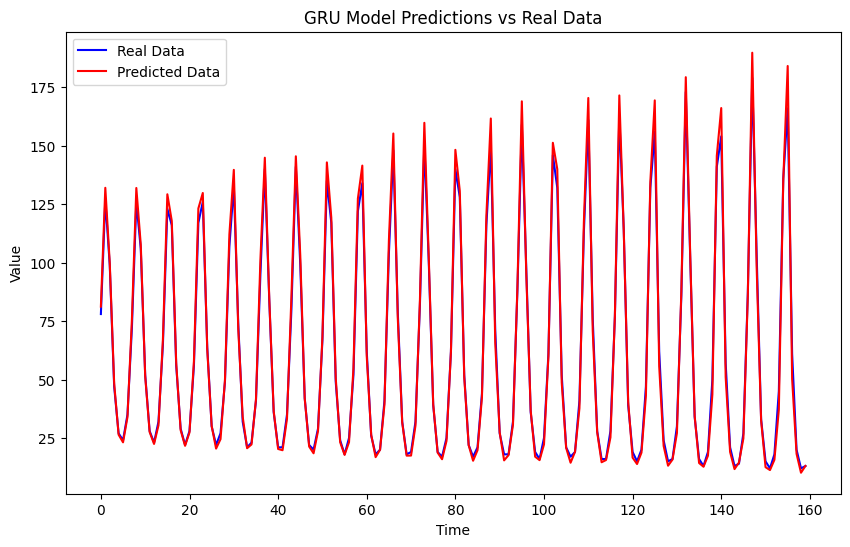

In [10]:
# Define and compile the model
model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_GRU.add(GRU(units=50))
model_GRU.add(Dense(units=1))
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stop = EarlyStopping(monitor='loss', patience=5)
model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

# Make predictions
predictions = model_GRU.predict(X_test)

# Inverse transform to get original scale
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate error metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predictions_inv)

# Print the errors
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, color='blue', label='Real Data')
plt.plot(predictions_inv, color='red', label='Predicted Data')
plt.title('GRU Model Predictions vs Real Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig("GRUModelPredictionsvsRealData.jpg")
plt.show()


## Recursive prediction
As stated in assignment c, the best model (GRU) is used to predict 200 steps recursively using the previsouly determined best time-step.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━

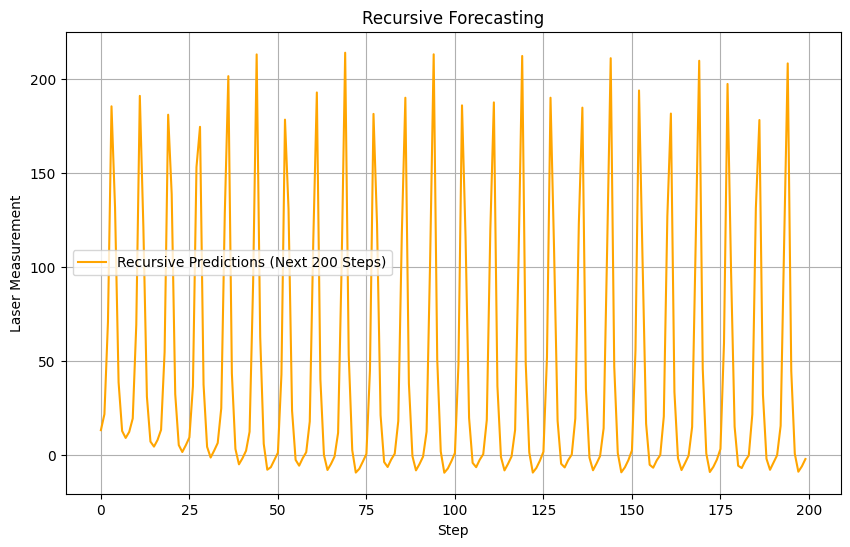

In [11]:
last_input = X_test[-1].reshape(1, X_test.shape[1], 1)
recursive_preds = []

for _ in range(200):
    next_pred = model_GRU.predict(last_input)[0, 0]
    recursive_preds.append(next_pred)

    # Slide the window forward: drop first value, add new prediction
    last_input = np.append(last_input[:, 1:, :], [[[next_pred]]], axis=1)

#actual values
recursive_preds_scaled = scaler.inverse_transform(np.array(recursive_preds).reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(recursive_preds_scaled, label='Recursive Predictions (Next 200 Steps)', color='orange')
plt.title('Recursive Forecasting')
plt.xlabel('Step')
plt.ylabel('Laser Measurement')
plt.legend()
plt.grid(True)
plt.show()

plot to show the last 150 known values from the test set (in blue) followed by the 200 recursively predicted future steps (in orange).

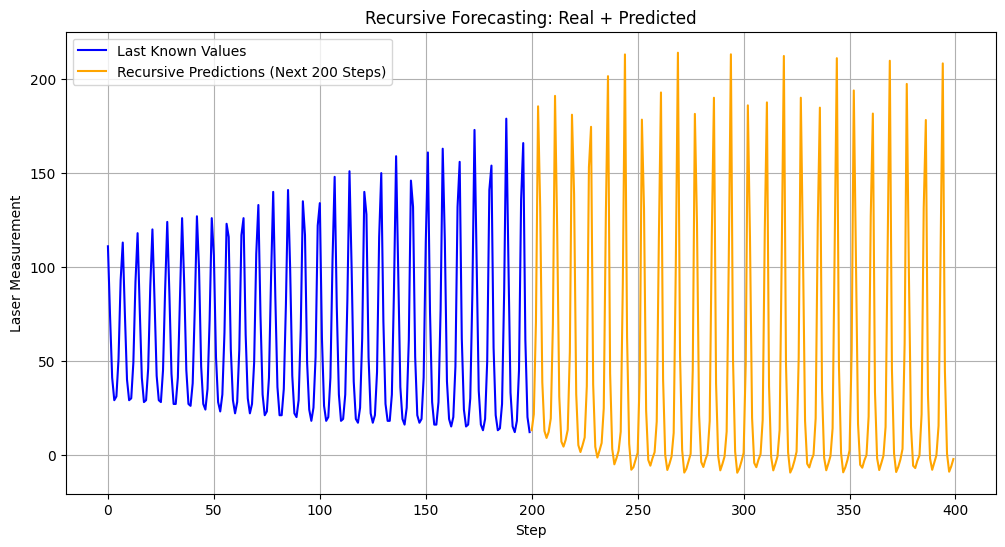

In [12]:
true_window = scaler.inverse_transform(X_test[-1].reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(true_window)), true_window, label="Last Known Values", color='blue')
plt.plot(np.arange(len(true_window), len(true_window) + len(recursive_preds_scaled)),
         recursive_preds_scaled, label="Recursive Predictions (Next 200 Steps)", color='orange')
plt.xlabel("Step")
plt.ylabel("Laser Measurement")
plt.title("Recursive Forecasting: Real + Predicted")
plt.legend()
plt.grid(True)
plt.savefig("RecursiveForecastingRealANDPredicted.jpg")
plt.show()